In [1]:
!pip install scikit-learn==1.1.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


**Import Libraries**

In the initial phase of creating the Boston House Prediction Model, we start by importing the necessary libraries that will empower us to manipulate, analyze, and visualize the data effectively. This commonly includes libraries like pandas for data manipulation, numpy for numerical operations, and matplotlib or seaborn for data visualization. These libraries provide us with powerful tools that set the stage for developing an accurate prediction model.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# suppress warning messages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# load data
boston = load_boston()
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)

# show description for understanding
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Check Data Columns**

With the data loaded, it's essential to get an overview of the structure of the dataset. Checking the data columns involves examining the different attributes or features present in the dataset. This step allows us to understand what kind of information is available for each house entry. By using commands like dataframe.columns, we gain insight into the variables that will play a role in predicting house prices.

In [5]:
# check data columns
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


**Step 4: Explore the Head of the Data**

To delve deeper into the dataset, we explore the first few rows of the data using the dataframe.head() function. This glimpse provides us with a preview of the data's layout and the values contained within different columns. This initial exploration is crucial for understanding the structure of the data and the kind of information it holds, enabling us to plan our data preprocessing and model development accordingly.

In [6]:
bdf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


**Identify the Target Variable**

In a predictive modeling scenario, identifying the target variable is paramount. For the Boston House Prediction Model, the target variable is typically the "house price" or "median value of owner-occupied homes" in a particular neighborhood. This variable is what we aim to predict accurately using the model. By clarifying the target variable, we define the objective of our prediction task.

In [7]:
bdf['MEDV'] = boston.target
print(bdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [8]:
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Generate Descriptive Statistics**

To gain deeper insights into the dataset's numerical attributes, we compute descriptive statistics using the dataframe.describe() function. This step offers key statistics such as mean, standard deviation, minimum, maximum, and quartiles for each numeric feature. Understanding these statistics helps us identify potential outliers, assess data distributions, and make informed decisions about data preprocessing.

In [9]:
# summarize data

bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Before I put data directly into the model, some variables may not be useful or need some preprocessing.

**Feature analysis & processing**

We can observe that the data is distributed normally with few outliers.

Interesting thing to notice is that there is no houses that exceeds MEDV value of 50.

The dataset may have upper limit, however, I thought it may be hard to examine the housing prices with value of 50 in real world data, so I skipped about it.

/tmp/ipykernel_20/3832780685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(bdf['MEDV'])


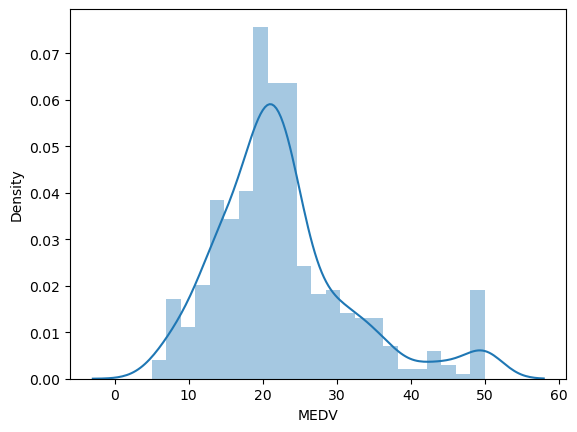

In [10]:
graph = sns.distplot(bdf['MEDV'])

Based on the description above, I divided the dataset into two: numerical and catogorical values.

Numerical values:

     CRIM     crime rate
     ZN       proportion of residential land over 25,000 sq.ft
     INDUS    proportion of non-retail business 
     NOX      nitric oxides concentration 
     RM       average number of rooms
     AGE      proportion of houses built prior to 1940
     DIS      weighted distances to five Boston employment centres
     TAX      full-value property-tax rate
     PTRATIO  pupil-teacher ratio
     B        proportion of African-American
     LSTAT    % lower status of the population

Catogorical values:

     CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
     RAD      index of accessibility to radial highways

1. Numerical values

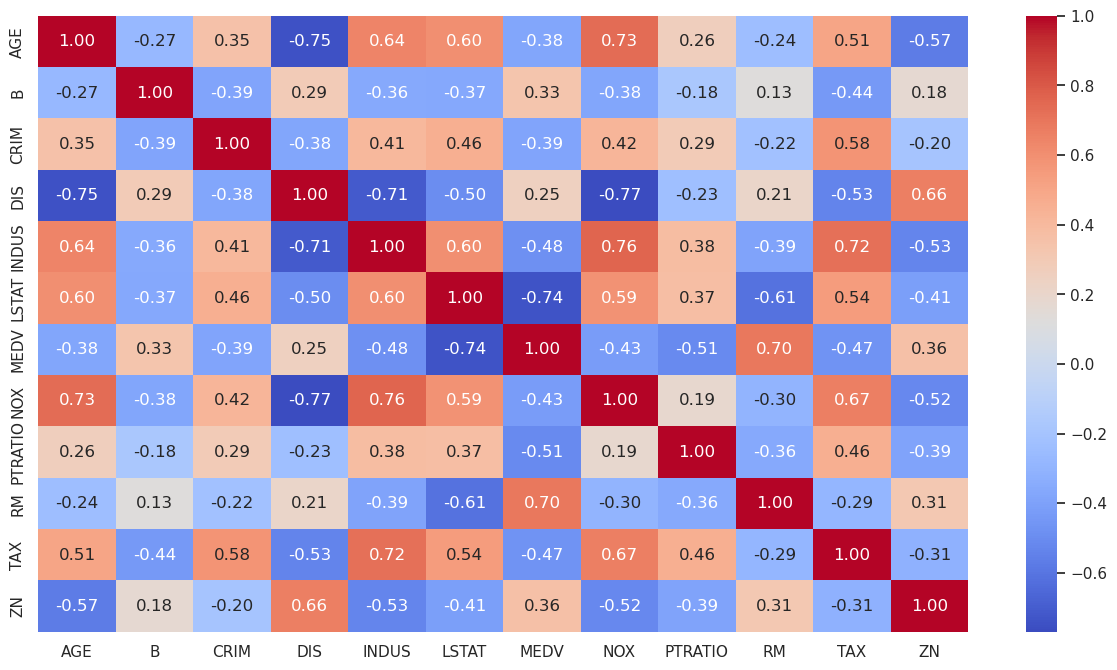

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
table = sns.heatmap(bdf[bdf.columns.difference(['CHAS', 'RAD'])].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

For numerical values, I first examined correlation between the input variables and the output variable.

Then, I take the variables with relatively high value (the absolute value is higher than 0.4).

For the variables with low value, I check the characteristics and do some preprocessing if applicable.

It seems that most features have corrleation with MEDV, so I decided to take columns with relatively high corrleations.

RM (average number of rooms) has highly positive corrleation with MEDV (price),

whereas LSTAT (% lower status of the population) has highly negative corrleation with MEDV.

Also, Tax (full-value property-tax rate), PTRATIO (pupil-teacher ratio), INDUS (proportion of non-retail business) have negative corrleation with MEDV.

Other features can be useful for predicting prices. To determine it, let us examine columns in detail.

Age (proportion of houses built prior to 1940)

It does not seem to be a clear correlation between them.

B (proportion of African-American)
We can observe that houses with low B has relatively low MEDV value.

Also, values are negatively skewed, so I tried two ways.

1. log transformation.
2. transforming the column to categorical value: housings with high value of B and low value of B.

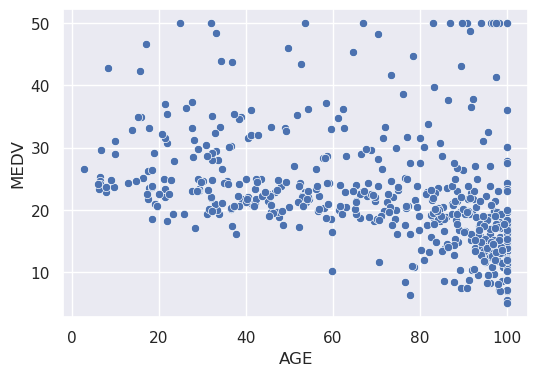

In [12]:
sns.set(rc={'figure.figsize':(6,4)})
graph = sns.scatterplot(x="AGE", y="MEDV", data=bdf)

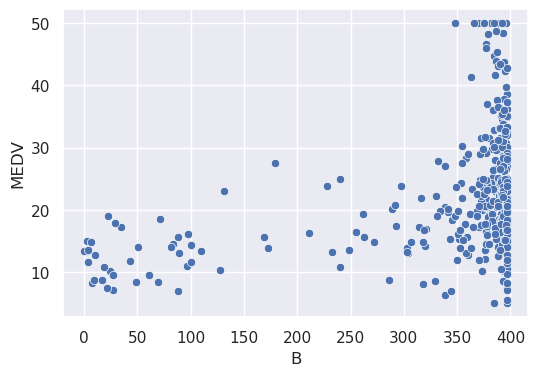

In [13]:
graph = sns.scatterplot(x="B", y="MEDV", data=bdf)

In [14]:
bdf['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

-2.8903737121414492


/tmp/ipykernel_20/1953692677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bdf['B'])


<Axes: xlabel='B', ylabel='Density'>

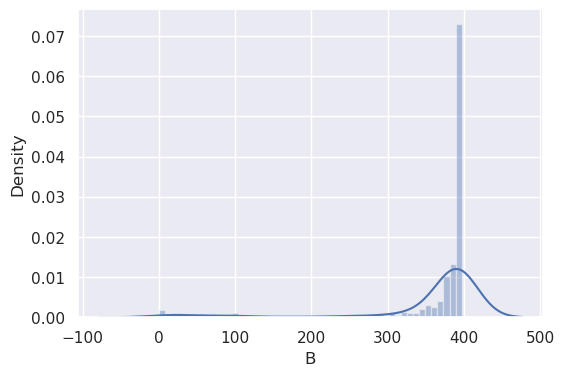

In [15]:
print(bdf['B'].skew())
sns.distplot(bdf['B'])

/tmp/ipykernel_20/3576204880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_log)


-4.826998303936602


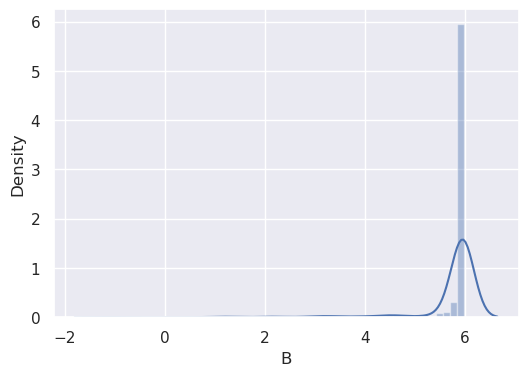

In [16]:
df_log = np.log(bdf['B'])
sns.distplot(df_log)
print(df_log.skew())

Left-skewed values are not transformed well because log-functions do not change much in higher values.

So I change the values into left-skewed and do log transformation.

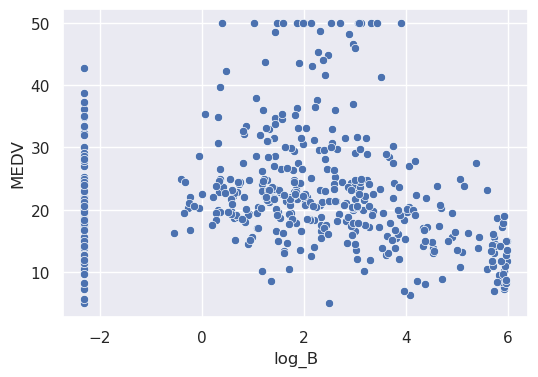

In [17]:
bdf['log_B'] = bdf['B'].map(lambda v: np.log(-v+397)) # adding maximum value + 1
graph = sns.scatterplot(x='log_B', y='MEDV', data=bdf)

-0.1369826147077553


/tmp/ipykernel_20/1040711001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bdf['log_B'])


<Axes: xlabel='log_B', ylabel='Density'>

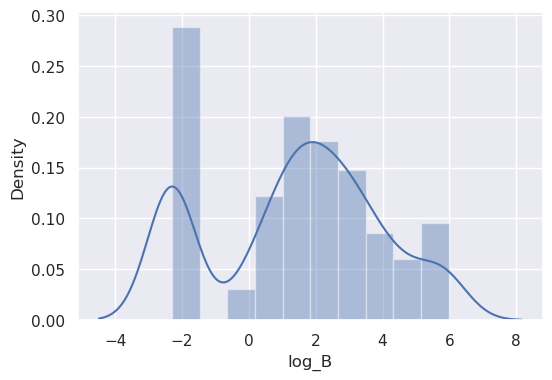

In [18]:
print(bdf['log_B'].skew())
sns.distplot(bdf['log_B'])

Skewness is clearly reduced by log transformation.

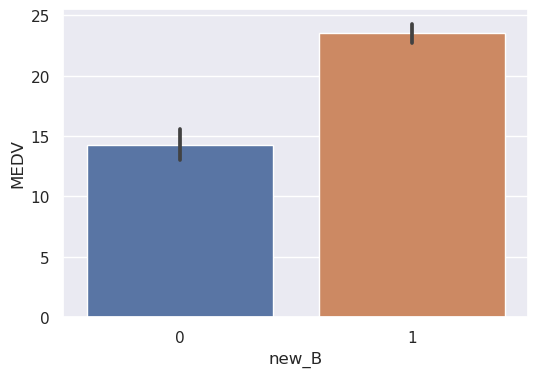

In [19]:
bdf['new_B'] = bdf['B'].map(lambda v: 1 if v >= 300 else 0)
graph = sns.barplot(x='new_B', y='MEDV', data=bdf)  

I divide the column into two parts: lower value and high value.

There is a clear tendency that houses with lower B value have higher possibility to have lower price.

**CRIM (crime rate)**

It shows that houses with low crime rate have the higher price.

Values are skewed as well.

I used similar strategy (log transformation, categorical transformation: dividing the column into two parts).

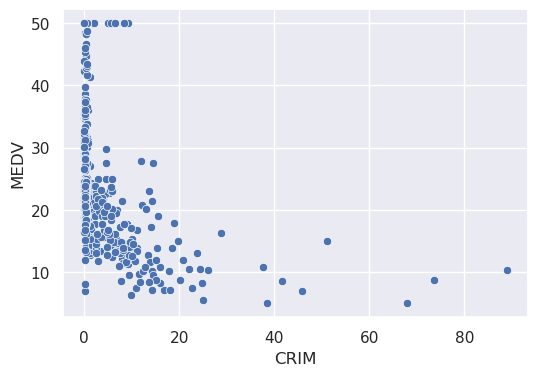

In [20]:
graph = sns.scatterplot(x="CRIM", y="MEDV", data=bdf)

/tmp/ipykernel_20/3015036257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bdf['CRIM'])


<Axes: xlabel='CRIM', ylabel='Density'>

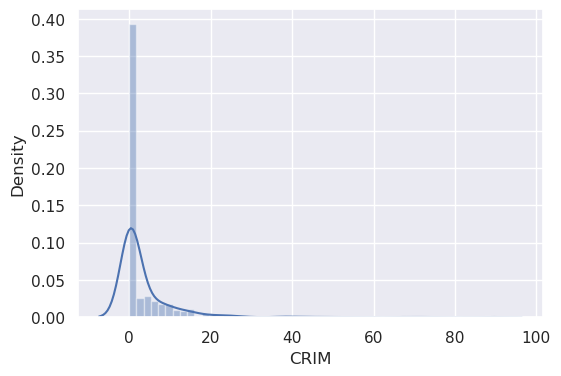

In [21]:
sns.distplot(bdf['CRIM'])

/tmp/ipykernel_20/4169689786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bdf['log_CRIM'])


<Axes: xlabel='log_CRIM', ylabel='Density'>

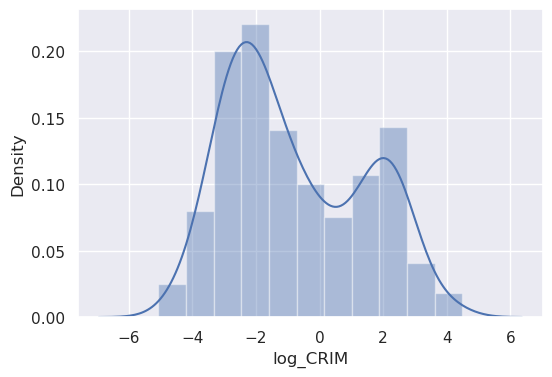

In [22]:
bdf['log_CRIM'] = np.log(bdf['CRIM'])
sns.distplot(bdf['log_CRIM'])

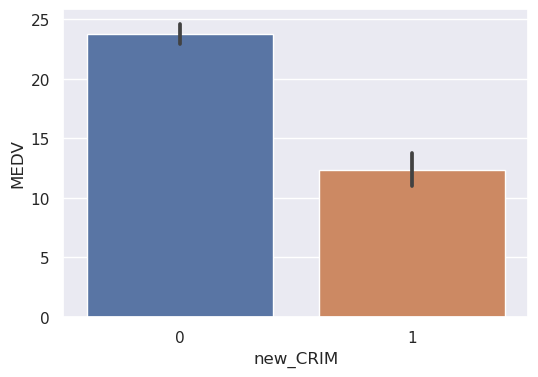

In [23]:
bdf['new_CRIM'] = bdf['CRIM'].map(lambda v: 1 if v >= 10 else 0)
graph = sns.barplot(x='new_CRIM', y='MEDV', data=bdf)

1) In case of the log transformation, as shown above, skewness is also clearly reduced.

2) In case of the categorical transformation, there is a clear difference between two categorical values, houses with low crime rate tend to have higher price.

**DIS (weighted distances to five Boston employment centres)**

It does not seem to be a clear correlation between them.

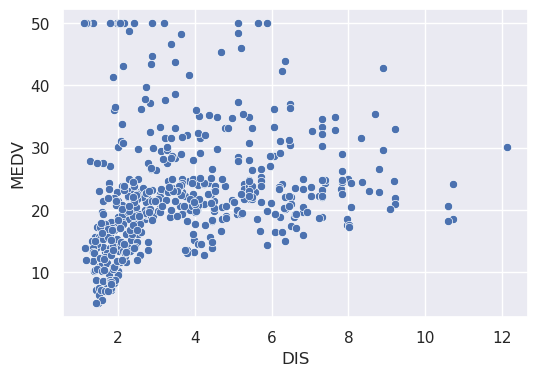

In [24]:
graph = sns.scatterplot(x="DIS", y="MEDV", data=bdf)

**ZN (proportion of residential land over 25,000 sq.ft)**

It does not show any tendency for MEDV value.

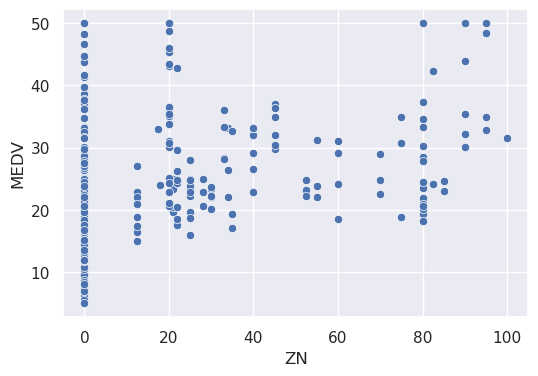

In [25]:
graph = sns.scatterplot(x="ZN", y="MEDV", data=bdf)

**Catogorical values**

**CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)**

Houses located next to river have more possibility to get higher price.

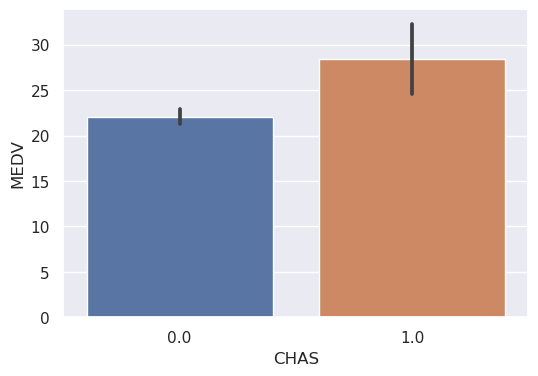

In [26]:
graph = sns.barplot(x="CHAS",y="MEDV",data=bdf)

**RAD (index of accessibility to radial highways)**




I found that the x-axis increases evenly (1,2,3 ...) at the first, but jumps from 8 to 24.

So I decided to divide the values into two.

low RAD values (1~8)
high RAD value (24)

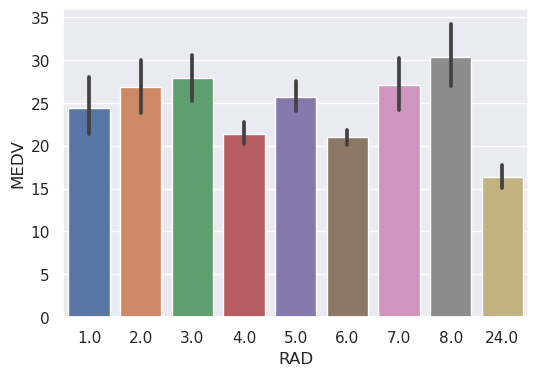

In [27]:
graph = sns.barplot(x="RAD",y="MEDV",data=bdf)

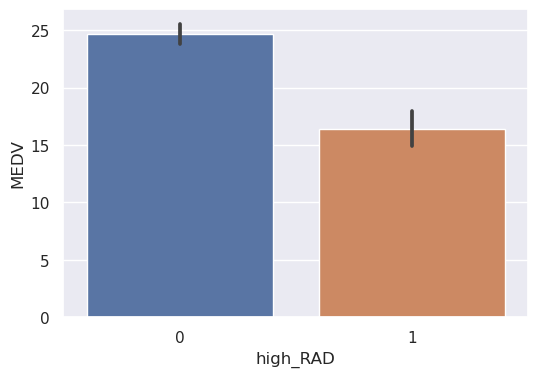

In [28]:
bdf['high_RAD'] = bdf['RAD'].map(lambda v: 1 if v >= 24 else 0)
graph = sns.barplot(x='high_RAD', y='MEDV', data=bdf)

From the graph, when the value is too high (i.e. if the house is located too close to the radial highway), the price is clearly low.

Result 

In [29]:
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,log_B,new_B,log_CRIM,new_CRIM,high_RAD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-2.302585,1,-5.064036,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-2.302585,1,-3.600502,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.427916,1,-3.601235,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.862890,1,-3.430523,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-2.302585,1,-2.672924,0,0


I did two different strategies for two columns (B, CRIM).

Based on the strategy that I did, I make two datasets: dataset with log transforamtion and categorical transformation.

In [30]:
# categorical transformation

dataset = bdf[['INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX', 
               'CHAS', 'new_B', 'new_CRIM', 'high_RAD', 'MEDV']]
dataset.head()

,INDUS,LSTAT,NOX,PTRATIO,RM,TAX,CHAS,new_B,new_CRIM,high_RAD,MEDV
0,2.31,4.98,0.538,15.3,6.575,296.0,0.0,1,0,0,24.0
1,7.07,9.14,0.469,17.8,6.421,242.0,0.0,1,0,0,21.6
2,7.07,4.03,0.469,17.8,7.185,242.0,0.0,1,0,0,34.7
3,2.18,2.94,0.458,18.7,6.998,222.0,0.0,1,0,0,33.4
4,2.18,5.33,0.458,18.7,7.147,222.0,0.0,1,0,0,36.2


In [31]:
dataset.shape

(506, 11)

In [32]:
# log transformation

log_dataset = bdf[['INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX', 
               'CHAS', 'log_B', 'log_CRIM', 'high_RAD', 'MEDV']]
log_dataset.head()

,INDUS,LSTAT,NOX,PTRATIO,RM,TAX,CHAS,log_B,log_CRIM,high_RAD,MEDV
0,2.31,4.98,0.538,15.3,6.575,296.0,0.0,-2.302585,-5.064036,0,24.0
1,7.07,9.14,0.469,17.8,6.421,242.0,0.0,-2.302585,-3.600502,0,21.6
2,7.07,4.03,0.469,17.8,7.185,242.0,0.0,1.427916,-3.601235,0,34.7
3,2.18,2.94,0.458,18.7,6.998,222.0,0.0,0.862890,-3.430523,0,33.4
4,2.18,5.33,0.458,18.7,7.147,222.0,0.0,-2.302585,-2.672924,0,36.2


In [33]:
log_dataset.shape

(506, 11)

**Modeling**


I made two different datasets having reasonable columns.


In this stage, I construct a neural network and train with the datasets.

**Preparing model**

In [34]:
import random
seed = 1 # control randomness

random.seed(seed)
np.random.seed(seed)

In [35]:
from sklearn.model_selection import train_test_split

dataset_x = dataset[['INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX', 
               'CHAS', 'new_B', 'new_CRIM', 'high_RAD']]
dataset_y = dataset['MEDV']

log_dataset_x = log_dataset[['INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX', 
               'CHAS', 'log_B', 'log_CRIM', 'high_RAD']]
log_dataset_y = log_dataset['MEDV']

train_x, test_x, train_y, test_y = train_test_split(dataset_x, dataset_y, test_size=0.2, shuffle=True)
log_train_x, log_test_x, log_train_y, log_test_y = train_test_split(log_dataset_x, log_dataset_y, test_size=0.2, shuffle=True)

import the function train_test_spilt to randomly select values from the dataset and divide the dataset into two: training set and testing set

In [36]:
print('train_x shape:', train_x.shape)
print('train_y shape:', train_y.shape)
print('test_x shape:', test_x.shape)
print('test_y shape:', test_y.shape)

print('log train_x shape:', log_train_x.shape)
print('log train_y shape:', log_train_y.shape)
print('log test_x shape:', log_test_x.shape)
print('log test_y shape:', log_test_y.shape)

train_x shape: (404, 10)
train_y shape: (404,)
test_x shape: (102, 10)
test_y shape: (102,)
log train_x shape: (404, 10)
log train_y shape: (404,)
log test_x shape: (102, 10)
log test_y shape: (102,)


In [37]:
# Pandas DataFrame to numpy array
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values

log_x_train = log_train_x.values
log_y_train = log_train_y.values
log_x_test = log_test_x.values
log_y_test = log_test_y.values

**ANN (Artifical Neural Network)**

Artificial Neural Network (ANN) learns from past data. It analyzes factors like room count, neighborhood safety, etc., adjusting its internal settings to understand price patterns. This learning enables it to make precise price predictions for new properties.

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import Subset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Executing the model on :", device)

Executing the model on : cpu


In [39]:
seed = 10 # control randomness

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Set the seed to control randomness.

If the value changes for every iteration, then I cannot evaluate the performance of the model.

In [40]:
# numpy to tensor
class NpTensor(Dataset):
# DataLoader needs (__getitem__ and __len__) of the Map-style dataset 
  def __init__(self, x, y):
    self.x = torch.FloatTensor(x)
    self.y = torch.FloatTensor(y)
    self.len = self.y.shape[0]  # number of rows

  def __getitem__(self, index):  # 
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [41]:
# hyperparameters

x_column = 10
hidden_layer = 50
output_layer = 1
learning_rate = 0.003 
epoch = 1000
batchsize = 32

In [42]:
trainset = NpTensor(x_train, y_train)
testset = NpTensor(x_test, y_test)
trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=False)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False)

In [43]:
log_trainset = NpTensor(log_x_train, log_y_train)
log_testset = NpTensor(log_x_test, log_y_test)
log_trainloader = DataLoader(log_trainset, batch_size=batchsize, shuffle=False)
log_testloader = DataLoader(log_testset, batch_size=batchsize, shuffle=False)

In [44]:
class Net(nn.Module):
    def __init__(self, x_column, hidden_layer, output_layer):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(x_column, hidden_layer)   # hidden layer
        self.fc2 = nn.Linear(hidden_layer, output_layer)   # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))      # activation function for hidden layer
        x = self.fc2(x)             # linear output
        return x
net = Net(x_column, hidden_layer, output_layer)
log_net = Net(x_column, hidden_layer, output_layer)

Since I made two datasets, so I make two models for each dataset.

In [45]:
optimizer = Adam(net.parameters(), lr=learning_rate)  # Adam gradient descent
log_optimizer = Adam(log_net.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()  # mean squared error loss

For better training, I put some scheduling;

If the loss of this epoch is bigger than the last loss, and this tendency repeats 5 times, I adjust the learning rate in 1/3.

In [46]:
# dataset
cnt = 0
last_loss = 0

for i in range(epoch):
    total_loss = 0.
    for input, actual in trainloader:
        optimizer.zero_grad()
        output = net(input)

        loss = loss_function(output, torch.unsqueeze(actual, dim=1))
        loss.backward()
        optimizer.step()
        total_loss += loss

    # scheduling
    if last_loss > total_loss:
        cnt = 0
    else:
        cnt += 1

    if cnt > 5:
        learning_rate = learning_rate / 3
        optimizer.lr = learning_rate
    
    last_loss = total_loss

    if ((i + 1) / 10) == ((i + 1) // 10):  # for every 10 epoch  
        print(f'Epoch {i+1}, loss: {total_loss}')

Epoch 10, loss: 1284.8314208984375
Epoch 20, loss: 597.956787109375
Epoch 30, loss: 529.25634765625
Epoch 40, loss: 478.33087158203125
Epoch 50, loss: 433.86328125
Epoch 60, loss: 395.6794738769531
Epoch 70, loss: 365.84210205078125
Epoch 80, loss: 344.7427062988281
Epoch 90, loss: 329.98760986328125
Epoch 100, loss: 319.2226257324219
Epoch 110, loss: 310.2431640625
Epoch 120, loss: 303.3571472167969
Epoch 130, loss: 297.7686462402344
Epoch 140, loss: 292.9862060546875
Epoch 150, loss: 289.7261962890625
Epoch 160, loss: 286.8686828613281
Epoch 170, loss: 284.7393798828125
Epoch 180, loss: 283.52752685546875
Epoch 190, loss: 281.10296630859375
Epoch 200, loss: 281.0284729003906
Epoch 210, loss: 278.8414001464844
Epoch 220, loss: 277.3914489746094
Epoch 230, loss: 263.1539306640625
Epoch 240, loss: 260.13494873046875
Epoch 250, loss: 256.4472351074219
Epoch 260, loss: 252.98423767089844
Epoch 270, loss: 250.54225158691406
Epoch 280, loss: 247.3766326904297
Epoch 290, loss: 244.5502777099

In [47]:
# log_dataset
cnt = 0
last_loss = 0

for i in range(epoch):
    total_loss = 0.0
    for input, actual in log_trainloader:
        log_optimizer.zero_grad()
        output = log_net(input)

        loss = loss_function(output, torch.unsqueeze(actual, dim=1))
        loss.backward()
        log_optimizer.step()
        total_loss += loss
        
         # scheduling
    if last_loss > total_loss:
        cnt = 0
    else:
        cnt += 1

    if cnt > 5:
        learning_rate = learning_rate / 3
        log_optimizer.lr = learning_rate
    
    last_loss = total_loss

    if ((i + 1) / 10) == ((i + 1) // 10):  # for every 10 epoch  
        print(f'Epoch {i+1}, loss: {total_loss}')

Epoch 10, loss: 1857.6796875
Epoch 20, loss: 915.3392333984375
Epoch 30, loss: 679.1668701171875
Epoch 40, loss: 627.4218139648438
Epoch 50, loss: 603.4087524414062
Epoch 60, loss: 580.3509521484375
Epoch 70, loss: 543.8843383789062
Epoch 80, loss: 497.15252685546875
Epoch 90, loss: 453.01593017578125
Epoch 100, loss: 412.00360107421875
Epoch 110, loss: 374.5533447265625
Epoch 120, loss: 343.6114196777344
Epoch 130, loss: 316.60247802734375
Epoch 140, loss: 296.5543212890625
Epoch 150, loss: 282.8227844238281
Epoch 160, loss: 274.2635498046875
Epoch 170, loss: 267.5067443847656
Epoch 180, loss: 263.7564392089844
Epoch 190, loss: 260.2355651855469
Epoch 200, loss: 257.9891052246094
Epoch 210, loss: 255.2589569091797
Epoch 220, loss: 233.2705841064453
Epoch 230, loss: 230.5737762451172
Epoch 240, loss: 228.01785278320312
Epoch 250, loss: 225.76048278808594
Epoch 260, loss: 223.91188049316406
Epoch 270, loss: 222.56517028808594
Epoch 280, loss: 220.91981506347656
Epoch 290, loss: 219.7346

**Evaluating model**

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
# R2, MSE, MAE

def evaluation(dataloader, neural_net): # function to return rmse and r2 values
  pred = torch.tensor([], dtype=torch.float)
  actual = torch.tensor([], dtype=torch.float)

  for data in dataloader:
    inputs, values = data
    outputs = neural_net(inputs)

    pred = torch.cat((pred, outputs), 0)
    actual = torch.cat((actual, values), 0)
    
  pred = pred.detach().numpy()
  actual = actual.detach().numpy()
  rmse = np.sqrt(MSE(actual, pred))
  r2 = r2_score(actual, pred)
  mae = MAE(actual, pred)

  return rmse, r2, mae

In [49]:
t_rmse, t_r2, t_mae = evaluation(trainloader, net)
rmse, r2, mae = evaluation(testloader, net)

print(f'Training set RMSE: {t_rmse}, R2-score: {t_r2}, MAE: {t_mae}')
print(f'Testing set RMSE: {rmse}, R2-score: {r2}, MAE: {mae}')

Training set RMSE: 3.6847198009490967, R2-score: 0.8319271211215402, MAE: 2.594594717025757
Testing set RMSE: 3.647866725921631, R2-score: 0.8653517777311517, MAE: 2.806152105331421


In [50]:
t_rmse, t_r2, t_mae = evaluation(log_trainloader, log_net)
rmse, r2, mae = evaluation(log_testloader, log_net)

print(f'Training set RMSE: {t_rmse}, R2-score: {t_r2}, MAE: {t_mae}')
print(f'Testing set RMSE: {rmse}, R2-score: {r2}, MAE: {mae}')

Training set RMSE: 3.6421566009521484, R2-score: 0.8405744943406656, MAE: 2.5196738243103027
Testing set RMSE: 3.744553565979004, R2-score: 0.8419902590238169, MAE: 2.762655258178711


In order to compare the performance of the model, I tried to check the performance of other machine learning models.

**Linear Regression**

Linear Regression is a basic method for predicting house prices by finding the straight line that best fits the relationship between features (like size and rooms) and price. It helps estimate prices based on input features.

In [51]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

log_lin_model = LinearRegression()
log_lin_model.fit(log_x_train, log_y_train)

LinearRegression()

In [52]:
# evaluating model

train_pred = lin_model.predict(x_train)
rmse = np.sqrt(MSE(train_pred, y_train))
r2 = r2_score(train_pred, y_train)
mae = MAE(train_pred, y_train)

print(f'trainset RMSE: {rmse}')
print(f'trainset R2: {r2}')
print(f'trainset MAE: {mae}')

test_pred = lin_model.predict(x_test)
rmse = np.sqrt(MSE(test_pred, y_test))
r2 = r2_score(test_pred, y_test)
mae = MAE(test_pred, y_test)

print(f'testset RMSE: {rmse}')
print(f'testset R2: {r2}')
print(f'testset MAE: {mae}')

trainset RMSE: 5.00796121718352
trainset R2: 0.5497503426594853
trainset MAE: 3.4416369630813213
testset RMSE: 5.205916110901041
testset R2: 0.47910097095480797
testset MAE: 4.041915187896718


In [53]:
# evaluating model

train_pred = log_lin_model.predict(log_x_train)
rmse = np.sqrt(MSE(train_pred, log_y_train))
r2 = r2_score(train_pred, log_y_train)
mae = MAE(train_pred, log_y_train)

print(f'log_trainset RMSE: {rmse}')
print(f'log_trainset R2: {r2}')
print(f'log_trainset MAE: {mae}')

test_pred = log_lin_model.predict(log_x_test)
rmse = np.sqrt(MSE(test_pred, log_y_test))
r2 = r2_score(test_pred, log_y_test)
mae = MAE(test_pred, log_y_test)

print(f'log_testset RMSE: {rmse}')
print(f'log_testset R2: {r2}')
print(f'log_testset MAE: {mae}')

log_trainset RMSE: 4.9073831337637746
log_trainset R2: 0.5926831787896067
log_trainset MAE: 3.462831833733913
log_testset RMSE: 5.695262227018597
log_testset R2: 0.5168572801769016
log_testset MAE: 3.6512114313603647


**Decision Tree**

Decision Trees are predictive models that segment house data into branches based on features, forming a tree-like structure. They're used to predict prices by following the branches to a final prediction at the leaves, capturing complex data patterns.

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

log_tree_model = DecisionTreeRegressor()
log_tree_model.fit(log_x_train, log_y_train)

DecisionTreeRegressor()

In [55]:
test_pred = tree_model.predict(x_test)
rmse = np.sqrt(MSE(test_pred, y_test))
r2 = r2_score(test_pred, y_test)
mae = MAE(test_pred, y_test)

print(f'testset RMSE: {rmse}')
print(f'testset R2: {r2}')
print(f'testset MAE: {mae}')

test_pred = log_tree_model.predict(log_x_test)
rmse = np.sqrt(MSE(test_pred, log_y_test))
r2 = r2_score(test_pred, log_y_test)
mae = MAE(test_pred, log_y_test)

print(f'log_testset RMSE: {rmse}')
print(f'log_testset R2: {r2}')
print(f'log_testset MAE: {mae}')


testset RMSE: 4.118644837093584
testset R2: 0.7823822704489032
testset MAE: 3.0088235294117647
log_testset RMSE: 5.403883861105244
log_testset R2: 0.6520309128864499
log_testset MAE: 3.405882352941177


**Support Vector Regression**

Support Vector Regression (SVR) predicts house prices by finding a hyperplane that minimizes errors. It considers a tolerance for error, capturing non-linear patterns and providing accurate estimates based on house features.

In [56]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(x_train, y_train)

log_svr_model = SVR(kernel = 'linear')
log_svr_model.fit(log_x_train, log_y_train)

SVR(kernel='linear')

In [57]:
train_pred = svr_model.predict(x_train)
rmse = np.sqrt(MSE(train_pred, y_train))
r2 = r2_score(train_pred, y_train)
mae = MAE(train_pred, y_train)

print(f'trainset RMSE: {rmse}')
print(f'trainset R2: {r2}')
print(f'trainset MAE: {mae}')

test_pred = svr_model.predict(x_test)
rmse = np.sqrt(MSE(test_pred, y_test))
r2 = r2_score(test_pred, y_test)
mae = MAE(train_pred, y_train)

print(f'testset RMSE: {rmse}')
print(f'testset R2: {r2}')
print(f'testset MAE: {mae}')

trainset RMSE: 5.196209369299787
trainset R2: 0.5018288159417974
trainset MAE: 3.233767156748386
testset RMSE: 5.076744590833942
testset R2: 0.5150879228437921
testset MAE: 3.233767156748386


In [58]:
train_pred = log_svr_model.predict(log_x_train)
rmse = np.sqrt(MSE(train_pred, log_y_train))
r2 = r2_score(train_pred, log_y_train)
mae = MAE(train_pred, log_y_train)

print(f'log_trainset RMSE: {rmse}')
print(f'log_trainset R2: {r2}')
print(f'log_trainset MAE: {mae}')

test_pred = log_svr_model.predict(log_x_test)
rmse = np.sqrt(MSE(test_pred, log_y_test))
r2 = r2_score(test_pred, log_y_test)
mae = MAE(train_pred, log_y_train)

print(f'log_testset RMSE: {rmse}')
print(f'log_testset R2: {r2}')
print(f'log_testset MAE: {mae}')

log_trainset RMSE: 5.059015923714507
log_trainset R2: 0.5326027351129414
log_trainset MAE: 3.303438997717262
log_testset RMSE: 6.21490836545606
log_testset R2: 0.39787679921329167
log_testset MAE: 3.303438997717262


**Analyzing results**

In [59]:
!pip install shap

**Artificial Neural Networks**
Artificial Neural Networks (ANN) excel at predicting house prices. Like the brain, ANN learns intricate patterns from data through interconnected layers. It adjusts weights to grasp feature-price connections, making precise predictions for new properties.

In [60]:
import shap

shap.initjs()
# dataset
explainer = shap.DeepExplainer(net, torch.FloatTensor(x_test))
shap_values = explainer.shap_values(torch.FloatTensor(x_test))

shap.force_plot(explainer.expected_value, shap_values[0,:], test_x.iloc[0,:])
# Bold = predicted output (MEDV) 

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


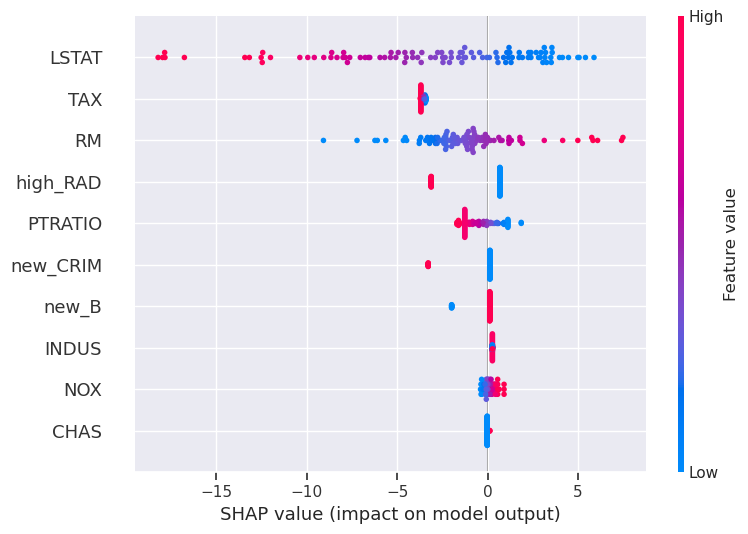

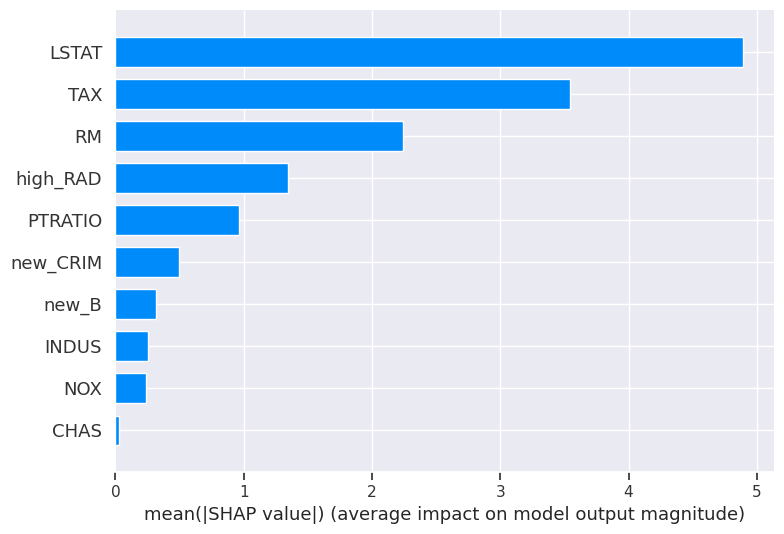

In [61]:
shap.summary_plot(shap_values, test_x)
shap.summary_plot(shap_values, test_x, plot_type='bar')

Interesting to notice is that the column TAX shows high contribution.

From the correlation matrix, TAX (-0.47) shows lower correlation compare to RM (0.70). However, in my model, TAX shows high contribution and some features affects the output not much (e.g. CHAS).

In [62]:
# log_dataset

shap.initjs()

explainer = shap.DeepExplainer(log_net, torch.FloatTensor(log_x_test))
shap_values = explainer.shap_values(torch.FloatTensor(log_x_test))

shap.force_plot(explainer.expected_value, shap_values[0,:], log_test_x.iloc[0,:])

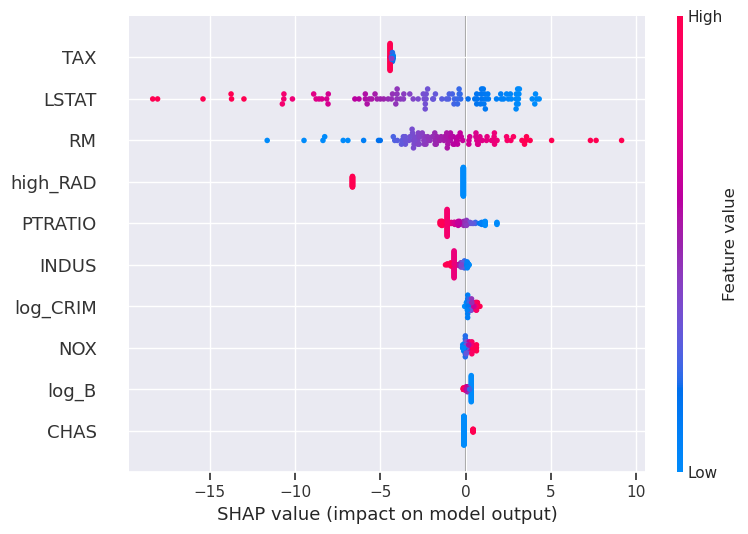

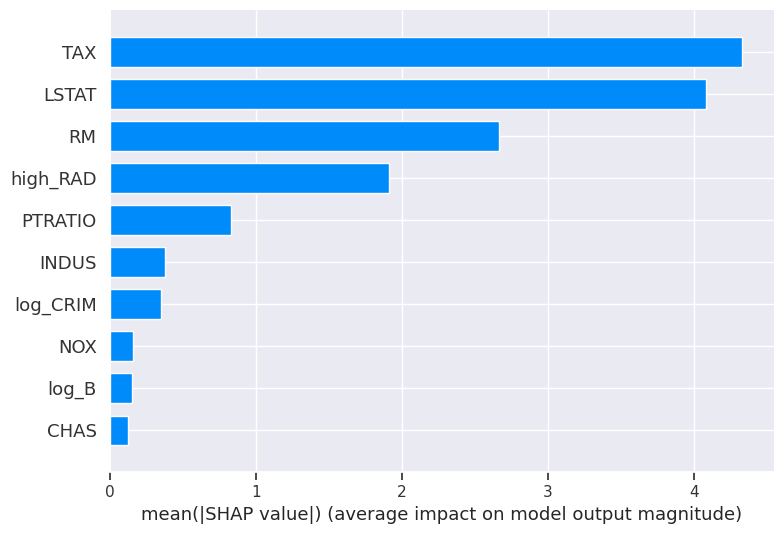

In [63]:
shap.summary_plot(shap_values, log_test_x)
shap.summary_plot(shap_values, log_test_x, plot_type='bar')

For the model with the log_dataset, TAX shows the highest contribution.

Also, log_B is suppressed and CHAS is slightly increased in contribution compare to the model with the dataset.